In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv("C:/Users/SAHIL/OneDrive/Documents/ML/Prodigy InfoTech/Try.csv")

In [3]:
data.head()

,total_sqft,Avg. Area Income,Avg. Area House Age,No.of_bedrooms,No.of_bathroom,Area Population,Price,Address
0,1056,79545.45857,5.682861,5,2.0,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,2920,79248.64245,6.002900,4,5.0,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2910,61287.06718,5.865890,5,2.0,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3310,63345.24005,7.188236,4,3.0,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,2710,59982.19723,5.040555,3,2.0,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.shape

(5000, 8)

In [5]:
data.head()

,total_sqft,Avg. Area Income,Avg. Area House Age,No.of_bedrooms,No.of_bathroom,Area Population,Price,Address
0,1056,79545.45857,5.682861,5,2.0,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,2920,79248.64245,6.002900,4,5.0,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2910,61287.06718,5.865890,5,2.0,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3310,63345.24005,7.188236,4,3.0,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,2710,59982.19723,5.040555,3,2.0,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_sqft           5000 non-null   int64  
 1   Avg. Area Income     5000 non-null   float64
 2   Avg. Area House Age  5000 non-null   float64
 3   No.of_bedrooms       5000 non-null   int64  
 4   No.of_bathroom       4968 non-null   float64
 5   Area Population      5000 non-null   float64
 6   Price                5000 non-null   float64
 7   Address              5000 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 312.6+ KB


In [7]:
data.isnull().sum()

total_sqft              0
Avg. Area Income        0
Avg. Area House Age     0
No.of_bedrooms          0
No.of_bathroom         32
Area Population         0
Price                   0
Address                 0
dtype: int64

In [8]:
data.describe()

,total_sqft,Avg. Area Income,Avg. Area House Age,No.of_bedrooms,No.of_bathroom,Area Population,Price
count,5000.00000,5000.000000,5000.000000,5000.000000,4968.000000,5000.000000,5.000000e+03
mean,2137.24460,68583.108984,5.977222,3.410600,2.721014,36163.516039,1.232073e+06
std,961.04589,10657.991214,0.991456,0.999504,1.471789,9925.650114,3.531176e+05
min,370.00000,17796.631190,2.644304,1.000000,1.000000,172.610686,1.593866e+04
25%,1460.00000,61480.562390,5.322283,3.000000,2.000000,29403.928700,9.975771e+05
50%,1970.00000,68804.286405,5.970429,3.000000,2.000000,36199.406690,1.232669e+06
75%,2620.00000,75783.338665,6.650808,4.000000,3.000000,42861.290770,1.471210e+06
max,13540.00000,107701.748400,9.519088,33.000000,40.000000,69621.713380,2.469066e+06


In [9]:
data['No.of_bathroom']=data['No.of_bathroom'].fillna(data['No.of_bathroom'].median())

In [10]:
data.describe()

,total_sqft,Avg. Area Income,Avg. Area House Age,No.of_bedrooms,No.of_bathroom,Area Population,Price
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2137.24460,68583.108984,5.977222,3.410600,2.716400,36163.516039,1.232073e+06
std,961.04589,10657.991214,0.991456,0.999504,1.468197,9925.650114,3.531176e+05
min,370.00000,17796.631190,2.644304,1.000000,1.000000,172.610686,1.593866e+04
25%,1460.00000,61480.562390,5.322283,3.000000,2.000000,29403.928700,9.975771e+05
50%,1970.00000,68804.286405,5.970429,3.000000,2.000000,36199.406690,1.232669e+06
75%,2620.00000,75783.338665,6.650808,4.000000,3.000000,42861.290770,1.471210e+06
max,13540.00000,107701.748400,9.519088,33.000000,40.000000,69621.713380,2.469066e+06


In [11]:
data.shape

(5000, 8)

# Linear Regression

In [12]:
X=data[['total_sqft','Avg. Area Income','Avg. Area House Age','No.of_bedrooms','No.of_bathroom','Area Population']]
Y=data['Price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [14]:
X_train

,total_sqft,Avg. Area Income,Avg. Area House Age,No.of_bedrooms,No.of_bathroom,Area Population
3413,1740,69048.78809,6.619712,4,5.0,36817.36876
1610,1320,67866.89993,5.393978,2,3.0,43122.57418
3459,2560,56636.23819,5.497667,4,3.0,47541.43176
4293,1260,79310.36198,4.247434,2,5.0,43982.18896
1039,2020,72821.24766,6.480819,3,4.0,40594.05930
...,...,...,...,...,...,...
4171,2080,56610.64256,4.846832,3,3.0,25494.74030
599,2340,70596.85095,6.548274,3,2.0,51614.83014
1361,1370,55621.89910,3.735942,3,5.0,63184.61315
1547,2510,63044.46010,5.935261,4,2.0,32725.27954


In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, Y_train)

LinearRegression()

In [17]:
coeff_data= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [18]:
coeff_data

,Coefficient
total_sqft,2.156923
Avg. Area Income,21.453208
Avg. Area House Age,163352.531044
No.of_bedrooms,-1689.695466
No.of_bathroom,2542.835740
Area Population,15.465319


In [19]:
prediction = lm.predict(X_test)

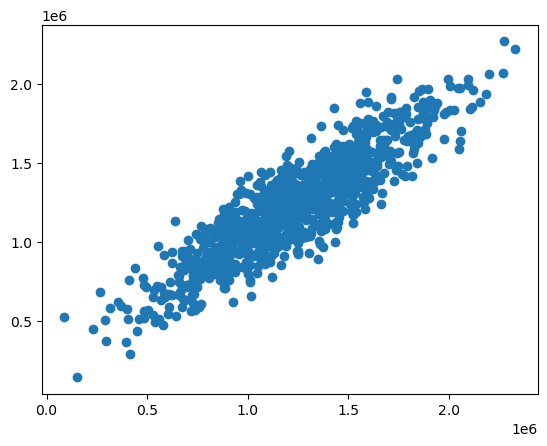

In [20]:
plt.scatter(Y_test, prediction)